In [4]:
!pip install tensorflow
!pip install keras

  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/385.0 MB 3.7 MB/s eta 0:01:44
   ---------------------------------------- 0.5/385.0 MB 6.8 MB/s eta 0:00:57
   ---------------------------------------- 1.1/385.0 MB 8.4 MB/s eta 0:00:46
   ---------------------------------------- 3.0/385.0 MB 17.3 MB/s eta 0:00:23
    --------------------------------------- 6.8/385.0 MB 31.0 MB/s eta 0:00:13
    --------------------------------------- 6.8/385.0 MB 31.0 MB/s eta 0:00:13
    --------------------------------------- 6.8/385.0 MB 31.0 MB/s eta 0:00:13
   - -------------------------------------- 10.0/385.0 MB 27.9 MB/s eta 0:00:14
 


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 데이터 로딩
url = 'https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/abalone.csv'
data = pd.read_csv(url)
data = data.drop(columns='id')

# 레이블과 특성 분리
X = data.drop('Rings', axis=1)
y = data['Rings']

# 범주형 데이터 처리 (Sex 열)
X = pd.get_dummies(X, columns=['Sex'])

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




C:\Users\Hyeon\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# 랜덤 포레스트 회귀 모델 생성 및 훈련
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [3]:
# 교차 검증 실행
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)

# 교차 검증 결과 출력
print("교차 검증 RMSE 점수: ", rmse_scores)
print("평균 RMSE: ", rmse_scores.mean())

교차 검증 RMSE 점수:  [3.08704697 1.64837694 2.35289062 1.9064304  1.9716008 ]
평균 RMSE:  2.1932691442833594


Mean Squared Error: 5.089339114832536


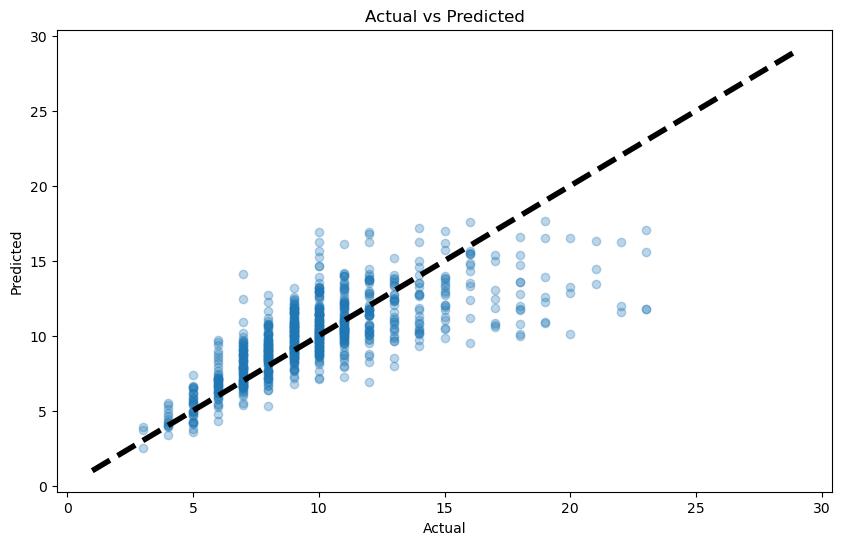

In [9]:
# 테스트 데이터에 대한 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Rings의 실제값과 예측값 비교
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
# 실재값과 예측값 비교 --> 점선이 실재값과 예측값이 같은 지점입니다.
# 4~ 13사이에 대부분의 데이터가 실재값과 예측값 범주에 있음이 보이지만, 
# 13 이후에서부터 점차 벗어나는 것이 보입니다.

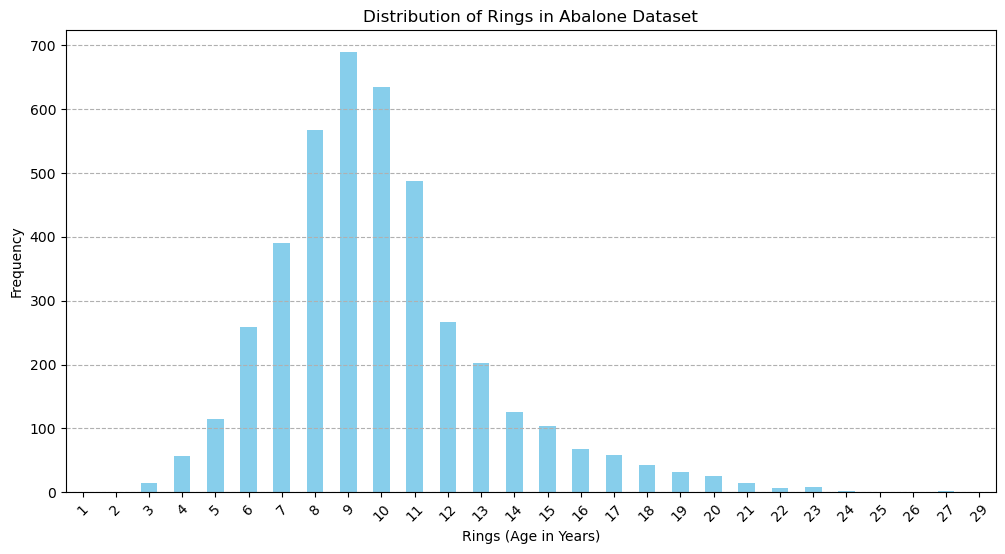

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Rings 값의 빈도수 계산
rings_distribution = data['Rings'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(12, 6))
rings_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Rings in Abalone Dataset')
plt.xlabel('Rings (Age in Years)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

In [14]:
# 레이블 별 데이터 갯수를 확인한 결과, 13 이후부터 데이터가 급격히 줄어있는 것을 확인,
# 샘플이 부족하여 나타난 현상으로 보입니다. 이를 해결하기 위해 데이터 증간을 사용하거나, 특정 영역에 해당하는 데이터를 늘리는 방향을 고려해볼 수 있을 것 같습니다.
# 혹은 크게 의미가 없는 지점에서부터는 샘플을 오히려 없애는 것도 좋은 방향일 것이라고 생각합니다.

In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# 데이터 로드
url = 'https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/abalone.csv'
data = pd.read_csv(url)

# 범주형 데이터 수치형으로 변환
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# 특성 엔지니어링
data['Length_to_Diameter'] = data['Length'] / data['Diameter']
data['Weight_Ratio'] = data['Shucked_weight'] / data['Whole_weight']
data['Height_to_Length'] = data['Height'] / data['Length']  # 새로운 특성 추가

# 특성과 타겟 분리
X = data.drop(['Rings'], axis=1)
y = data['Rings']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# XGBoost 회귀 모델 훈련
xgb_regressor = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_regressor.fit(X_train, y_train)
y_pred_xgb = xgb_regressor.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)

# 결과 출력
print(f'XGB Regressor R^2 Score: {r2_xgb:.2f}')

C:\Users\Hyeon\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


XGB Regressor R^2 Score: 0.68


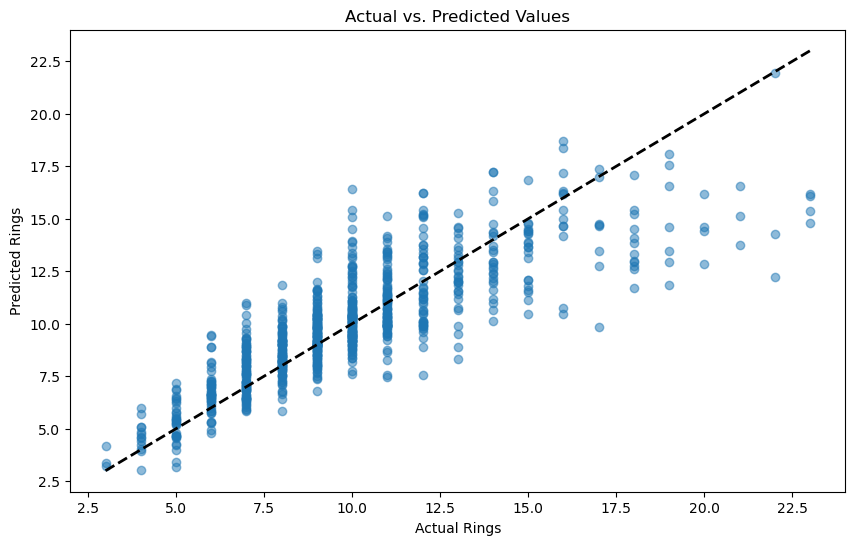

RMSE: 1.859
R² Score: 0.681


In [2]:
import matplotlib.pyplot as plt

# 예측
y_pred = xgb_regressor.predict(X_test).flatten()

# 실제 값과 예측 값 비교 그래프
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 완벽한 예측선
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.show()

# 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 결과 출력
print(f'RMSE: {rmse:.3f}')
print(f'R² Score: {r2:.3f}')

In [ ]:
# 이전보다 더 잘 반영하는 것으로 보입니다.